In [2]:
import requests
baseUrl = 'http://www.illustris-project.org/api/'
headers = {"api-key":"3b865713af85f5da0dba3b577e289484"}
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)
    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [3]:
r = get(baseUrl)

In [4]:
r.keys()

dict_keys(['simulations'])

In [5]:
len(r['simulations'])

45

In [6]:
print(r['simulations'][0])
names = [sim['name'] for sim in r['simulations']]
print('Available', names)

{'name': 'Illustris-1', 'num_snapshots': 134, 'url': 'http://www.illustris-project.org/api/Illustris-1/'}
Available ['Illustris-1', 'Illustris-1-Dark', 'Illustris-2', 'Illustris-2-Dark', 'Illustris-3', 'Illustris-3-Dark', 'TNG100-1', 'TNG100-1-Dark', 'TNG100-2', 'TNG100-2-Dark', 'TNG100-3', 'TNG100-3-Dark', 'TNG300-3', 'TNG300-2-Dark', 'TNG300-2', 'TNG300-1-Dark', 'TNG300-1', 'TNG300-3-Dark', 'Illustris-1-Subbox0', 'Illustris-1-Subbox1', 'Illustris-1-Subbox2', 'Illustris-1-Subbox3', 'Illustris-2-Subbox0', 'Illustris-2-Subbox1', 'Illustris-2-Subbox2', 'Illustris-2-Subbox3', 'Illustris-3-Subbox0', 'Illustris-3-Subbox1', 'Illustris-3-Subbox2', 'Illustris-3-Subbox3', 'TNG100-1-Subbox0', 'TNG100-1-Subbox1', 'TNG100-2-Subbox0', 'TNG100-2-Subbox1', 'TNG100-3-Subbox0', 'TNG100-3-Subbox1', 'TNG300-3-Subbox1', 'TNG300-3-Subbox2', 'TNG300-3-Subbox0', 'TNG300-2-Subbox1', 'TNG300-2-Subbox2', 'TNG300-2-Subbox0', 'TNG300-1-Subbox1', 'TNG300-1-Subbox2', 'TNG300-1-Subbox0']


In [7]:
i = names.index('Illustris-1')

In [8]:
sim = get( r['simulations'][i]['url'] )

In [9]:
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [10]:
sim['snapshots']

'http://www.illustris-project.org/api/Illustris-1/snapshots/'

In [11]:
snaps = get( sim['snapshots'] )

In [12]:
print(len(snaps))

134


In [13]:
snaps[-2]# this is the one at z=0

{'number': 134,
 'redshift': 0.00952166696794476,
 'num_groups_subfind': 4372442,
 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/'}

In [14]:
snap = get( snaps[-2]['url'] ) # you can also download these things here - 
#https://www.illustris-project.org/data/downloads/Illustris-3/

In [15]:
snap

{'simulation': 'http://www.illustris-project.org/api/Illustris-1/',
 'number': 134,
 'redshift': 0.00952166696794476,
 'num_gas': 5270721162,
 'num_dm': 6028568000,
 'num_trmc': 6028568000,
 'num_stars': 605005065,
 'num_bhs': 32317,
 'num_groups_fof': 7697109,
 'num_groups_subfind': 4372442,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 1641284651032.0,
 'filesize_groupcat': 4811888304.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/',
 'subhalos': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/plot.png?xQuant=msta

In [16]:
# grab the subhalos
subs = get( snap['subhalos'] )
print(subs.keys())

dict_keys(['count', 'next', 'previous', 'results'])


In [17]:
print(subs['results'])

[{'id': 0, 'sfr': 3.50136, 'mass_log_msun': 14.49126019270269, 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/0/'}, {'id': 1, 'sfr': 0.00618325, 'mass_log_msun': 13.486307686195618, 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/1/'}, {'id': 2, 'sfr': 1.14053, 'mass_log_msun': 12.997053604995664, 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/2/'}, {'id': 3, 'sfr': 1.87813, 'mass_log_msun': 12.596292445414868, 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/3/'}, {'id': 4, 'sfr': 0.37845, 'mass_log_msun': 12.61456018844137, 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/4/'}, {'id': 5, 'sfr': 0.339137, 'mass_log_msun': 12.619934814596942, 'url': 'http://www.illustris-project.org/api/Illustris-1/snapshots/134/subhalos/5/'}, {'id': 6, 'sfr': 0.404688, 'mass_log_msun': 12.6469270061851, 'url': 'http://www.illustris-project.org/

In [18]:
# can modify the restrictions on the length of number of subhalos:
#subs = get( snap['subhalos'], {'limit':220} )

# The ordering is random unless otherwise specified:
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )
# Negative is descending order, otherwise ascending?

In [19]:
print([ subs['results'][i]['id'] for i in range(5) ])

[0, 29977, 72306, 58569, 79793]


In [20]:
sub = get( subs['results'][1]['url'] )

In [21]:
sub # this is the info for the second most massive subhalo

{'snap': 134,
 'id': 29977,
 'bhmdot': 0.000135408,
 'cm_x': 10948.1,
 'cm_y': 50831.8,
 'cm_z': 47661.6,
 'gasmetallicity': 0.00404659,
 'gasmetallicityhalfrad': 0.00771449,
 'gasmetallicitymaxrad': 0.0,
 'gasmetallicitysfr': 0.00963745,
 'gasmetallicitysfrweighted': 0.00954066,
 'pos_x': 10823.3,
 'pos_y': 50902.7,
 'pos_z': 47633.9,
 'halfmassrad': 549.507,
 'halfmassrad_gas': 792.71,
 'halfmassrad_dm': 539.035,
 'halfmassrad_stars': 51.918,
 'halfmassrad_bhs': 0.0,
 'len': 49588027,
 'len_gas': 10037944,
 'len_dm': 35791332,
 'len_stars': 3758725,
 'len_bhs': 26,
 'mass': 16955.3,
 'mass_gas': 959.244,
 'mass_dm': 15780.3,
 'mass_stars': 214.31,
 'mass_bhs': 1.45613,
 'massinhalfrad': 493.329,
 'massinhalfrad_gas': 0.9793,
 'massinhalfrad_dm': 383.749,
 'massinhalfrad_stars': 107.155,
 'massinhalfrad_bhs': 1.44638,
 'massinmaxrad': 0.000782,
 'massinmaxrad_gas': 0.0,
 'massinmaxrad_dm': 0.0,
 'massinmaxrad_stars': 0.000782,
 'massinmaxrad_bhs': 0.0,
 'massinrad': 1262.02,
 'massinr

In [22]:
# Try to look at this galaxy and its descendent in imaging
print()
print('Progenitors', sub['prog_snap'], sub['prog_sfid'])
print('Descendents', sub['desc_snap'],sub['desc_sfid'])


Progenitors 133 29142
Descendents 135 30430


In [23]:
sub['related']['sublink_progenitor']

'http://www.illustris-project.org/api/Illustris-1/snapshots/133/subhalos/29142/'

In [24]:
snap_prog = get( sub['related']['sublink_progenitor'])


In [25]:
print(snap_prog)

{'snap': 133, 'id': 29142, 'bhmdot': 0.000365595, 'cm_x': 10917.7, 'cm_y': 50847.3, 'cm_z': 47649.0, 'gasmetallicity': 0.00378632, 'gasmetallicityhalfrad': 0.00729108, 'gasmetallicitymaxrad': 0.00563381, 'gasmetallicitysfr': 0.0102793, 'gasmetallicitysfrweighted': 0.0102908, 'pos_x': 10791.7, 'pos_y': 50926.6, 'pos_z': 47626.5, 'halfmassrad': 532.186, 'halfmassrad_gas': 794.43, 'halfmassrad_dm': 519.527, 'halfmassrad_stars': 50.9431, 'halfmassrad_bhs': 0.0, 'len': 49345245, 'len_gas': 9936589, 'len_dm': 35662851, 'len_stars': 3745775, 'len_bhs': 30, 'mass': 16889.0, 'mass_gas': 950.112, 'mass_dm': 15723.6, 'mass_stars': 213.73, 'mass_bhs': 1.4971, 'massinhalfrad': 470.038, 'massinhalfrad_gas': 0.888331, 'massinhalfrad_dm': 360.842, 'massinhalfrad_stars': 106.865, 'massinhalfrad_bhs': 1.44171, 'massinmaxrad': 0.000647, 'massinmaxrad_gas': 7.3e-05, 'massinmaxrad_dm': 0.0, 'massinmaxrad_stars': 0.000574, 'massinmaxrad_bhs': 0.0, 'massinrad': 1219.58, 'massinrad_gas': 4.35524, 'massinrad_d

In [26]:
cutout_request = {'gas':'Coordinates,Masses'}
cutout = get(sub['related']['sublink_progenitor']+"cutout.hdf5", cutout_request)

KeyboardInterrupt: 

In [37]:
import numpy as np
import matplotlib.pyplot as plt

id = 109974
url = "http://www.illustris-project.org/api/Illustris-1/snapshots/68/subhalos/" + str(id)
sub = get(url) # get json response of subhalo properties

# prepare dict to hold result arrays
fields = ['snap','id','mass_gas','mass_stars','mass_dm','mass_bhs']
r = {}
for field in fields:
    r[field] = []
 
while sub['desc_sfid'] != -1:
    for field in fields:
        r[field].append(sub[field])
    # request the full subhalo details of the descendant by following the sublink URL
    sub = get(sub['related']['sublink_descendant'])

# make a plot (notice our subhalo falls into a much more massive halo around snapshot 105)
for partType in ['gas','dm','stars','bhs']:
    mass_logmsun = np.log10( np.array(r['mass_'+partType])*1e10/0.704)
    plt.plot(r['snap'],mass_logmsun,label=partType)

plt.xlabel('Snapshot Number')
plt.ylabel('Mass [log $M_\odot$]')
plt.legend(loc='lower right');

{'snap': 68, 'id': 109974, 'bhmdot': 0.000962666, 'cm_x': 61959.6, 'cm_y': 61560.5, 'cm_z': 58227.8, 'gasmetallicity': 0.00248148, 'gasmetallicityhalfrad': 0.00347269, 'gasmetallicitymaxrad': 0.00201499, 'gasmetallicitysfr': 0.00280244, 'gasmetallicitysfrweighted': 0.00366123, 'pos_x': 61912.1, 'pos_y': 61610.0, 'pos_z': 58204.1, 'halfmassrad': 122.736, 'halfmassrad_gas': 106.192, 'halfmassrad_dm': 125.319, 'halfmassrad_stars': 22.6602, 'halfmassrad_bhs': 0.0, 'len': 249707, 'len_gas': 102104, 'len_dm': 140332, 'len_stars': 7270, 'len_bhs': 1, 'mass': 73.0386, 'mass_gas': 10.883, 'mass_dm': 61.8719, 'mass_stars': 0.283605, 'mass_bhs': 0.000159, 'massinhalfrad': 3.73802, 'massinhalfrad_gas': 0.946372, 'massinhalfrad_dm': 2.64979, 'massinhalfrad_stars': 0.141705, 'massinhalfrad_bhs': 0.000159, 'massinmaxrad': 54.5225, 'massinmaxrad_gas': 8.66006, 'massinmaxrad_dm': 45.5861, 'massinmaxrad_stars': 0.276219, 'massinmaxrad_bhs': 0.000159, 'massinrad': 9.57952, 'massinrad_gas': 2.50215, 'mass

NameError: name 'STOP' is not defined

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


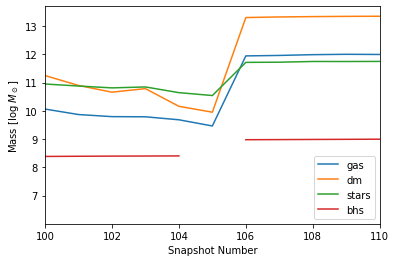

In [30]:
# make a plot (notice our subhalo falls into a much more massive halo around snapshot 105)
for partType in ['gas','dm','stars','bhs']:
    mass_logmsun = np.log10( np.array(r['mass_'+partType])*1e10/0.704)
    plt.plot(r['snap'],mass_logmsun,label=partType)

plt.xlabel('Snapshot Number')
plt.ylabel('Mass [log $M_\odot$]')
plt.xlim([100,110])
plt.legend(loc='lower right');

In [ ]:
def get(path, params=None):
    # make HTTP GET request to path
    headers = {"api-key":"3b865713af85f5da0dba3b577e289484"}
    r = requests.get(path, params=params, headers=headers)
    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string
    return r

In [ ]:
# Okay now plot the snapshot for the above before and after case :)
#['snap','id','mass_gas','mass_stars','mass_dm','mass_bhs']


'''snaplist = np.arange(0,100)[::-1]
redshift = np.array([20,15,12,11,10,9.4,9,8.5,8,7.6,7.2,7,6.5,6,5.8,5.5,5.2,5,4.7,4.4,
                     4.2,4,3.7,3.5,3.3,3,2.9,2.7,2.6,2.4,2.3,2.2,2.1,2,1.9,1.8,1.7,1.7,1.6,1.5,
                     1.5,1.4,1.4,1.3,1.3,1.2,1.2,1.1,1.1,1,1,0.96,0.92,0.88,0.85,0.82,0.79,0.76,0.73,0.7,
                     0.67,0.65,0.62,0.6,0.57,0.55,0.53,0.5,0.48,0.46,0.44,0.42,
                     0.4,0.38,0.36,0.35,0.33,0.31,0.3,0.28,0.26,0.24,0.23,0.21,0.2,0.18,0.17,
                     0.15,0.14,0.13,0.11,0.1,0.086,0.073,0.06,0.048,0.035,0.023,0.012,0])[::-1]
print('snaps', snaplist)
print('redshift', redshift)
STOP'''

import h5py
print(r['snap'], r['id'])

ids = r['id']
snaps = r['snap']

little_h = 0.704

cutout_request = {'gas':'Coordinates,Masses'}#was {'gas':'Coordinates,Masses'}
#{'stars':'Coordinates,GFM_Metallicity'}

# it is of course possible this data product does not exist for all requested subhalos
for j in range(len(ids)):
    
    idj = ids[j]
    snap = snaps[j]
    
    print('id', idj, 'snap', snap)
    if snap <100 or snap > 110:
        continue
        
    redshift_url = "http://www.illustris-project.org/api/Illustris-1/snapshots/"+str(snap)
    scale_factor =  1 / (1 + get(redshift_url)['redshift'])
    
    sub_prog_url = "http://www.illustris-project.org/api/Illustris-1/snapshots/"+str(snap)+"/subhalos/" + str(idj)
    sub_prog = get(sub_prog_url)
    
    cutout = get(sub_prog_url+"/cutout.hdf5", cutout_request)
    with h5py.File(cutout,'r') as f:
        x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
        y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
        
        x *= scale_factor/little_h
        y *= scale_factor/little_h
        #rr *= scale_factor/little_h # ckpc/h -> physical kpc
        #scale_factor = 1.0 / (1+redshift)
        #little_h = 0.704
        dens = np.log10(f['PartType0']['Masses'][:])
    plt.hist2d(x,y,weights=dens,bins=[150,100], cmap='RdYlGn')
    plt.xlabel('$\Delta x$ [kpc]')
    plt.ylabel('$\Delta y$ [kpc]');
    plt.title('Snap = '+str(snap)+' ID = '+str(idj))
    plt.show()

### The main question that I have is how to load a tree so I can then walk through it

In [44]:
i = names.index('Illustris-1')
baseUrl = 'http://www.tng-project.org/api/'
r = get(baseUrl)
sim = get( r['simulations'][i]['url'] )
snaps = get( sim['snapshots'] )
snaps[-1]

{'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_groups_subfind': 4366546,
 'url': 'http://www.tng-project.org/api/Illustris-1/snapshots/135/'}

In [88]:
snap = get( snaps[-1]['url'] )
#print(snap)
print(snap['number'])
subs = get( snap['subhalos'], {'limit':3, 'order_by':'-mass_stars'} )
# limit to one to make it smaller, this is 
sub = get( subs['results'][2]['url'] )
print(sub)


135
{'snap': 135, 'id': 66080, 'bhmdot': 0.000157363, 'cm_x': 40608.2, 'cm_y': 66844.2, 'cm_z': 43095.1, 'gasmetallicity': 0.0144487, 'gasmetallicityhalfrad': 0.0184647, 'gasmetallicitymaxrad': 0.0, 'gasmetallicitysfr': 0.0112652, 'gasmetallicitysfrweighted': 0.0113597, 'pos_x': 40706.3, 'pos_y': 66911.6, 'pos_z': 43122.0, 'halfmassrad': 458.262, 'halfmassrad_gas': 608.636, 'halfmassrad_dm': 454.353, 'halfmassrad_stars': 42.2246, 'halfmassrad_bhs': 0.0443, 'len': 33095494, 'len_gas': 6455667, 'len_dm': 23327841, 'len_stars': 3311961, 'len_bhs': 25, 'mass': 11085.8, 'mass_gas': 613.164, 'mass_dm': 10285.2, 'mass_stars': 186.883, 'mass_bhs': 0.633044, 'massinhalfrad': 347.482, 'massinhalfrad_gas': 1.97861, 'massinhalfrad_dm': 251.433, 'massinhalfrad_stars': 93.4416, 'massinhalfrad_bhs': 0.628891, 'massinmaxrad': 0.001143, 'massinmaxrad_gas': 0.0, 'massinmaxrad_dm': 0.0, 'massinmaxrad_stars': 0.001143, 'massinmaxrad_bhs': 0.0, 'massinrad': 807.778, 'massinrad_gas': 5.97825, 'massinrad_dm'

In [92]:
url_tree = sub['trees']['sublink']#was 'sublink_mpb'
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [93]:
import h5py
tree = get(url_tree)
f = h5py.File(tree,'r')
print(f.keys())
# link to a page that lists what these things all are - https://www.illustris-project.org/data/docs/specifications/

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'Group_M_Crit200', 'Group_M_Mean200', 'Group_M_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloID', 'SubhaloIDMostbound', 'SubhaloIDRaw', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetallicity', 'SubhaloStar

663985
[49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 37 62 61 60 59 58 57 56
 54 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 61 60 59 58 57 56 54
 52 51]
[0.54847527 0.507031   0.46602762 0.43384218 0.39724776 0.36153516
 0.32538164 0.2901099  0.2552791  0.22044826 0.18120848 0.14505495
 0.10757875 0.08465213 0.05423027 0.02380841 0.00749524 0.7865594
 0.76407367 0.7424697  0.7191022  0.69441205 0.656054   0.6199005
 0.6035873  0.5471526  0.49027693 0.44221923 0.39636597 0.34742647
 0.29584157 0.24734294 0.2036942  0.17327233 0.14240958 0.11198772
 0.08553392 0.05731655 0.03527172 0.01631317 0.00661345 0.6992619
 0.6847123  0.67016274 0.6459134  0.61637336 0.5868333  0.5555296
 0.5215806  0.48807245]


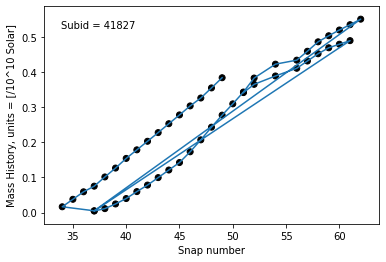

~~~~~Mergers~~~~~~
# = 3894
Snapnum [121 121 121 ... 134 134 134]
SubfindID [  41939   41259   41560 ...   79746 3119691   77271]


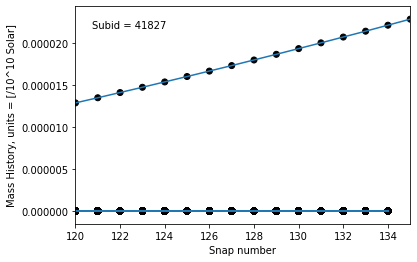

In [152]:
h = 0.7

with h5py.File(tree,'r') as t:
    snapnum = t['SnapNum'][:]
    mass = t['MassHistory'][:]
    subfindid = t['SubfindID'][:]

print(len(snapnum))
start = 15000
end = 15050

lower_snap = 120#was 60
upper_snap = 135#was 85
print(snapnum[start:end])
print(mass[start:end])

# Okay look for all places where snapnum switches over, this is when a merger happens
color_pt = []
merger_index = []
for j in range(len(snapnum)):
    if j==0:
        color_pt.append('black')
        continue
        #try:
    if (snapnum[j] - snapnum[j-1]) > 1 and snapnum[j] > lower_snap and snapnum[j] <upper_snap:
        #print(abs(snapnum[j+1] - snapnum[j]), snapnum[j], snapnum[j+1])
        color_pt.append('red')
        merger_index.append(j)
        #STOP
    else:
        color_pt.append('black')




plt.clf()
plt.plot(snapnum[start:end],(mass[start:end]*h))
plt.scatter(snapnum[start:end],(mass[start:end]*h), color=color_pt[start:end])
plt.annotate('Subid = '+str(sub['id']), xy=(0.05,0.9), xycoords='axes fraction')
plt.xlabel('Snap number')
plt.ylabel('Mass History, units = [/10^10 Solar]')
#plt.ylim([-0.004,0.004])
#plt.xlim([100,130])
plt.show()


print('~~~~~Mergers~~~~~~')
print('# = '+str(len(merger_index)))
#print('indices', merger_index)
print('Snapnum',snapnum[merger_index])
print('SubfindID', subfindid[merger_index])

# What if you just select the mergers between a certain range of redshifts, snapshots
# roughly correspond to redshifts 65 and 80 should do it?



plt.clf()
plt.plot(snapnum,(mass*h))
plt.scatter(snapnum,(mass*h), color=color_pt)
plt.annotate('Subid = '+str(sub['id']), xy=(0.05,0.9), xycoords='axes fraction')
plt.xlabel('Snap number')
plt.ylabel('Mass History, units = [/10^10 Solar]')
#plt.ylim([-0.004,0.004])
plt.xlim([lower_snap, upper_snap])
#plt.ylim([0,5e-8])
#snapshot 68 is z = 2.002
plt.show()

### Now, I want to be able to take a list of these and get some sort of image to check that this is right
I also need to check out how to get the mass ratio

In [151]:
# Get them images:
import matplotlib.image as mpimg
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import BytesIO ## for Python 3

#print('Snapnum',snapnum[merger_index])
#print('SubfindID', subfindid[merger_index])
number =     snapnum[merger_index][0:6]
ids = subfindid[merger_index][0:6]
sub_count = 1
plt.figure(figsize=[15,3])

for j in range(len(ids)):
    url = "http://www.illustris-project.org/api/Illustris-1/snapshots/"+str(number[j])+"/subhalos/" + str(ids[j])
    sub = get(url)
    # it is of course possible this data product does not exist for all requested subhalos
    if 'stellar_mocks' in sub['supplementary_data']: 
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
        response = get(png_url)
        # make plot a bit nicer
        plt.subplot(1,len(ids),sub_count)
        plt.text(0,-20,"ID="+str(id),color='blue')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        sub_count += 1

        # plot the PNG binary data directly, without actually saving a .png file
        file_object = BytesIO(response.content)
        plt.imshow(mpimg.imread(file_object))
plt.show()

<Figure size 1080x216 with 0 Axes>

In [35]:
import illustris_python as ill
BASE_PATH_ILLUSTRIS_1 = "/n/ghernquist/Illustris/Runs/L75n1820FP"
#from illustris_python import ill, BASE_PATH_ILLUSTRIS_1
def test_numMergers():
    snap = 135
    ratio = 1.0/5.0
    start = 100

    # Values for Illustris-1, snap=135, start=100
    num_mergers = [2, 2, 3, 4, 3]

    group_first_sub = ill.groupcat.loadHalos("http://www.illustris-project.org/api/Illustris-1/snapshots/"+str(snap), 
                                             snap, fields=['GroupFirstSub'])

    # the following fields are required for the walk and the mass ratio analysis
    fields = ['SubhaloID', 'NextProgenitorID', 'MainLeafProgenitorID',
              'FirstProgenitorID', 'SubhaloMassType']
    for i, nm in zip(range(start, start+5), num_mergers):
        tree = ill.sublink.loadTree(BASE_PATH_ILLUSTRIS_1, snap, group_first_sub[i], fields=fields)
        _num_merg = ill.sublink.numMergers(tree, minMassRatio=ratio)
        print("group_first_sub[{}] = {}, num_mergers = {} (should be {})".format(
            i, group_first_sub[i], _num_merg, nm))
        assert_equal(_num_merg, nm)

    return


def maxPastMass(tree, index, partType='stars'):
    """ Get maximum past mass (of the given partType) along the main branch of a subhalo
        specified by index within this tree. """
    ptNum = partTypeNum(partType)

    branchSize = tree['MainLeafProgenitorID'][index] - tree['SubhaloID'][index] + 1
    masses = tree['SubhaloMassType'][index: index + branchSize, ptNum]
    return np.max(masses)


def numMergers(tree, minMassRatio=1e-10, massPartType='stars', index=0):
    """ Calculate the number of mergers in this sub-tree (optionally above some mass ratio threshold). """
    # verify the input sub-tree has the required fields
    reqFields = ['SubhaloID', 'NextProgenitorID', 'MainLeafProgenitorID',
                 'FirstProgenitorID', 'SubhaloMassType']

    if not set(reqFields).issubset(tree.keys()):
        raise Exception('Error: Input tree needs to have loaded fields: '+', '.join(reqFields))

    numMergers   = 0
    invMassRatio = 1.0 / minMassRatio

    # walk back main progenitor branch
    rootID = tree['SubhaloID'][index]
    fpID   = tree['FirstProgenitorID'][index]

    while fpID != -1:
        fpIndex = index + (fpID - rootID)
        fpMass  = maxPastMass(tree, fpIndex, massPartType)

        # explore breadth
        npID = tree['NextProgenitorID'][fpIndex]

        while npID != -1:
            npIndex = index + (npID - rootID)
            npMass  = maxPastMass(tree, npIndex, massPartType)

            # count if both masses are non-zero, and ratio exceeds threshold
            if fpMass > 0.0 and npMass > 0.0:
                ratio = npMass / fpMass

                if ratio >= minMassRatio and ratio <= invMassRatio:
                    numMergers += 1

            npID = tree['NextProgenitorID'][npIndex]

        fpID = tree['FirstProgenitorID'][fpIndex]

    return numMergers

In [36]:
test_numMergers()

OSError: Unable to open file (unable to open file: name = 'http://www.illustris-project.org/api/Illustris-1/snapshots/135/groups_135/fof_subhalo_tab_135.0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Okay now plot the snapshot for the above before and after case :)
#['snap','id','mass_gas','mass_stars','mass_dm','mass_bhs']
print(r['snap'], r['id'])

ids = r['id']
snaps = r['snap']

# it is of course possible this data product does not exist for all requested subhalos
for j in range(len(ids)):
    idj = ids[j]
    snap = snaps[j]
    print('id', idj, 'snap', snap)
    url = "http://www.illustris-project.org/api/Illustris-1/snapshots/"+str(snap)+"/subhalos/" + str(idj)
    sub = get(url)
    if 'stellar_mocks' in sub['supplementary_data']: 
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        
        print(sub['supplementary_data'])
        try:
            png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
            response = get(png_url)
            # make plot a bit nicer
            plt.subplot(1,len(ids),sub_count)
            plt.text(0,-20,"ID="+str(id),color='blue')
            plt.gca().axes.get_xaxis().set_ticks([])
            plt.gca().axes.get_yaxis().set_ticks([])
            sub_count += 1

            # plot the PNG binary data directly, without actually saving a .png file
            file_object = BytesIO(response.content)
            plt.imshow(mpimg.imread(file_object))
            plt.show()
        except:
            fits_url = sub['supplementary_data']['stellar_mocks']['fits']
            response = get(png_url)
            file_object = BytesIO(response.content)
            plt.imshow(mpimg.imread(file_object))
            plt.show()
plt.show()       

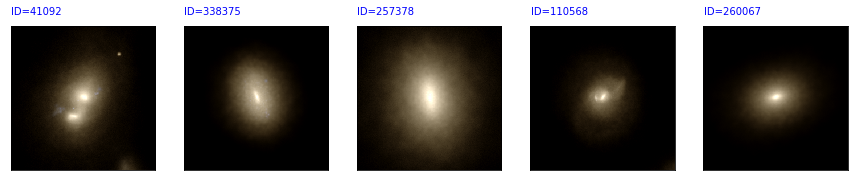

In [57]:
# Get them images:
import matplotlib.image as mpimg
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import BytesIO ## for Python 3

ids = [41092,338375,257378,110568,260067]
sub_count = 1
plt.figure(figsize=[15,3])

for id in ids:
    url = "http://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(id)
    sub = get(url)
    # it is of course possible this data product does not exist for all requested subhalos
    if 'stellar_mocks' in sub['supplementary_data']: 
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
        response = get(png_url)
        # make plot a bit nicer
        plt.subplot(1,len(ids),sub_count)
        plt.text(0,-20,"ID="+str(id),color='blue')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        sub_count += 1

        # plot the PNG binary data directly, without actually saving a .png file
        file_object = BytesIO(response.content)
        plt.imshow(mpimg.imread(file_object))